In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

population_data = pd.read_csv('C:/Users/sharvan.das/Desktop/Python Data Science/DataSets/population.csv')

geojson_url = "https://raw.githubusercontent.com/Subhash9325/GeoJson-Data-of-Indian-States/refs/heads/master/Indian_States"

india_states = gpd.read_file(geojson_url)

In [3]:
print(india_states.columns)

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'NL_NAME_1', 'VARNAME_1',
       'TYPE_1', 'ENGTYPE_1', 'filename', 'filename_1', 'filename_2',
       'filename_3', 'filename_4', 'geometry'],
      dtype='object')


In [4]:
print(india_states.NAME_1)

0        Andaman and Nicobar
1             Andhra Pradesh
2          Arunachal Pradesh
3                      Assam
4                      Bihar
5                 Chandigarh
6               Chhattisgarh
7     Dadra and Nagar Haveli
8              Daman and Diu
9                      Delhi
10                       Goa
11                   Gujarat
12                   Haryana
13          Himachal Pradesh
14         Jammu and Kashmir
15                 Jharkhand
16                 Karnataka
17                    Kerala
18               Lakshadweep
19            Madhya Pradesh
20               Maharashtra
21                   Manipur
22                 Meghalaya
23                   Mizoram
24                  Nagaland
25                    Orissa
26                Puducherry
27                    Punjab
28                 Rajasthan
29                    Sikkim
30                Tamil Nadu
31                   Tripura
32             Uttar Pradesh
33               Uttaranchal
34            

In [5]:
india_states['STATE_NAME'] = india_states['NAME_1'].str.upper()

In [6]:
population_data['STATE_NAME'] = population_data['State'].str.upper()

In [7]:
print(india_states['STATE_NAME'])

0        ANDAMAN AND NICOBAR
1             ANDHRA PRADESH
2          ARUNACHAL PRADESH
3                      ASSAM
4                      BIHAR
5                 CHANDIGARH
6               CHHATTISGARH
7     DADRA AND NAGAR HAVELI
8              DAMAN AND DIU
9                      DELHI
10                       GOA
11                   GUJARAT
12                   HARYANA
13          HIMACHAL PRADESH
14         JAMMU AND KASHMIR
15                 JHARKHAND
16                 KARNATAKA
17                    KERALA
18               LAKSHADWEEP
19            MADHYA PRADESH
20               MAHARASHTRA
21                   MANIPUR
22                 MEGHALAYA
23                   MIZORAM
24                  NAGALAND
25                    ORISSA
26                PUDUCHERRY
27                    PUNJAB
28                 RAJASTHAN
29                    SIKKIM
30                TAMIL NADU
31                   TRIPURA
32             UTTAR PRADESH
33               UTTARANCHAL
34            

In [8]:
print(population_data['STATE_NAME'])

0                               ANDHRA PRADESH
1                            ARUNACHAL PRADESH
2                                        ASSAM
3                                        BIHAR
4                                 CHHATTISGARH
5                                          GOA
6                                      GUJARAT
7                                      HARYANA
8                             HIMACHAL PRADESH
9                                    JHARKHAND
10                                   KARNATAKA
11                                      KERALA
12                              MADHYA PRADESH
13                                 MAHARASHTRA
14                                     MANIPUR
15                                   MEGHALAYA
16                                     MIZORAM
17                                    NAGALAND
18                                      ODISHA
19                                      PUNJAB
20                                   RAJASTHAN
21           

In [9]:
merged_data = india_states.merge(population_data, how='left', on='STATE_NAME')


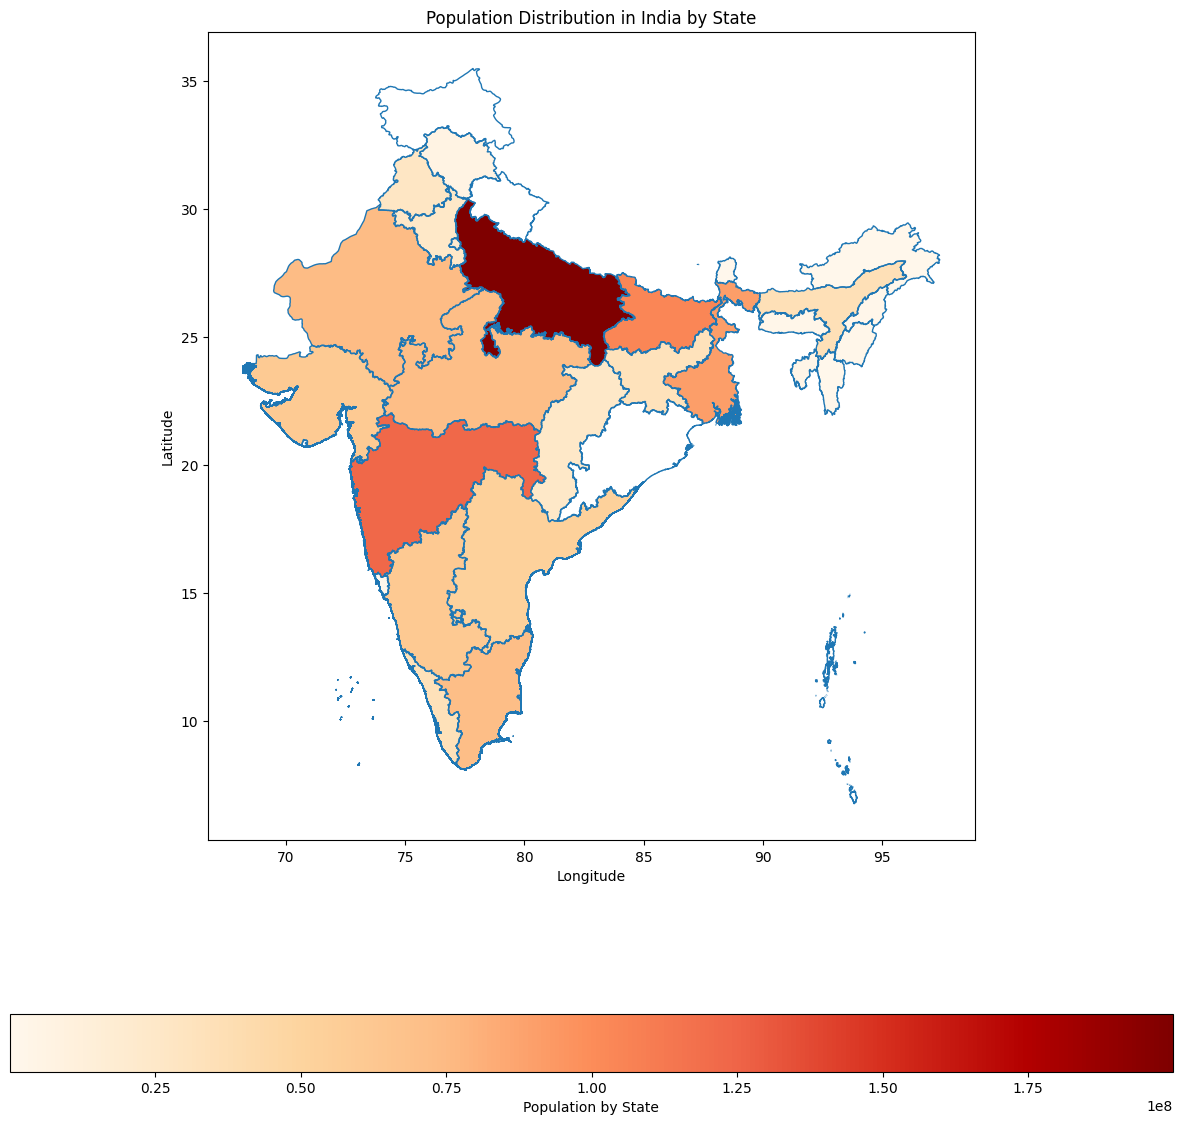

In [10]:
# Plotting the data
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
india_states.boundary.plot(ax=ax, linewidth=1)
merged_data.plot(column='Population', ax=ax, legend=True, cmap='OrRd', 
                 legend_kwds={'label': "Population by State",
                              'orientation': "horizontal"})

# Add title and labels
plt.title('Population Distribution in India by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


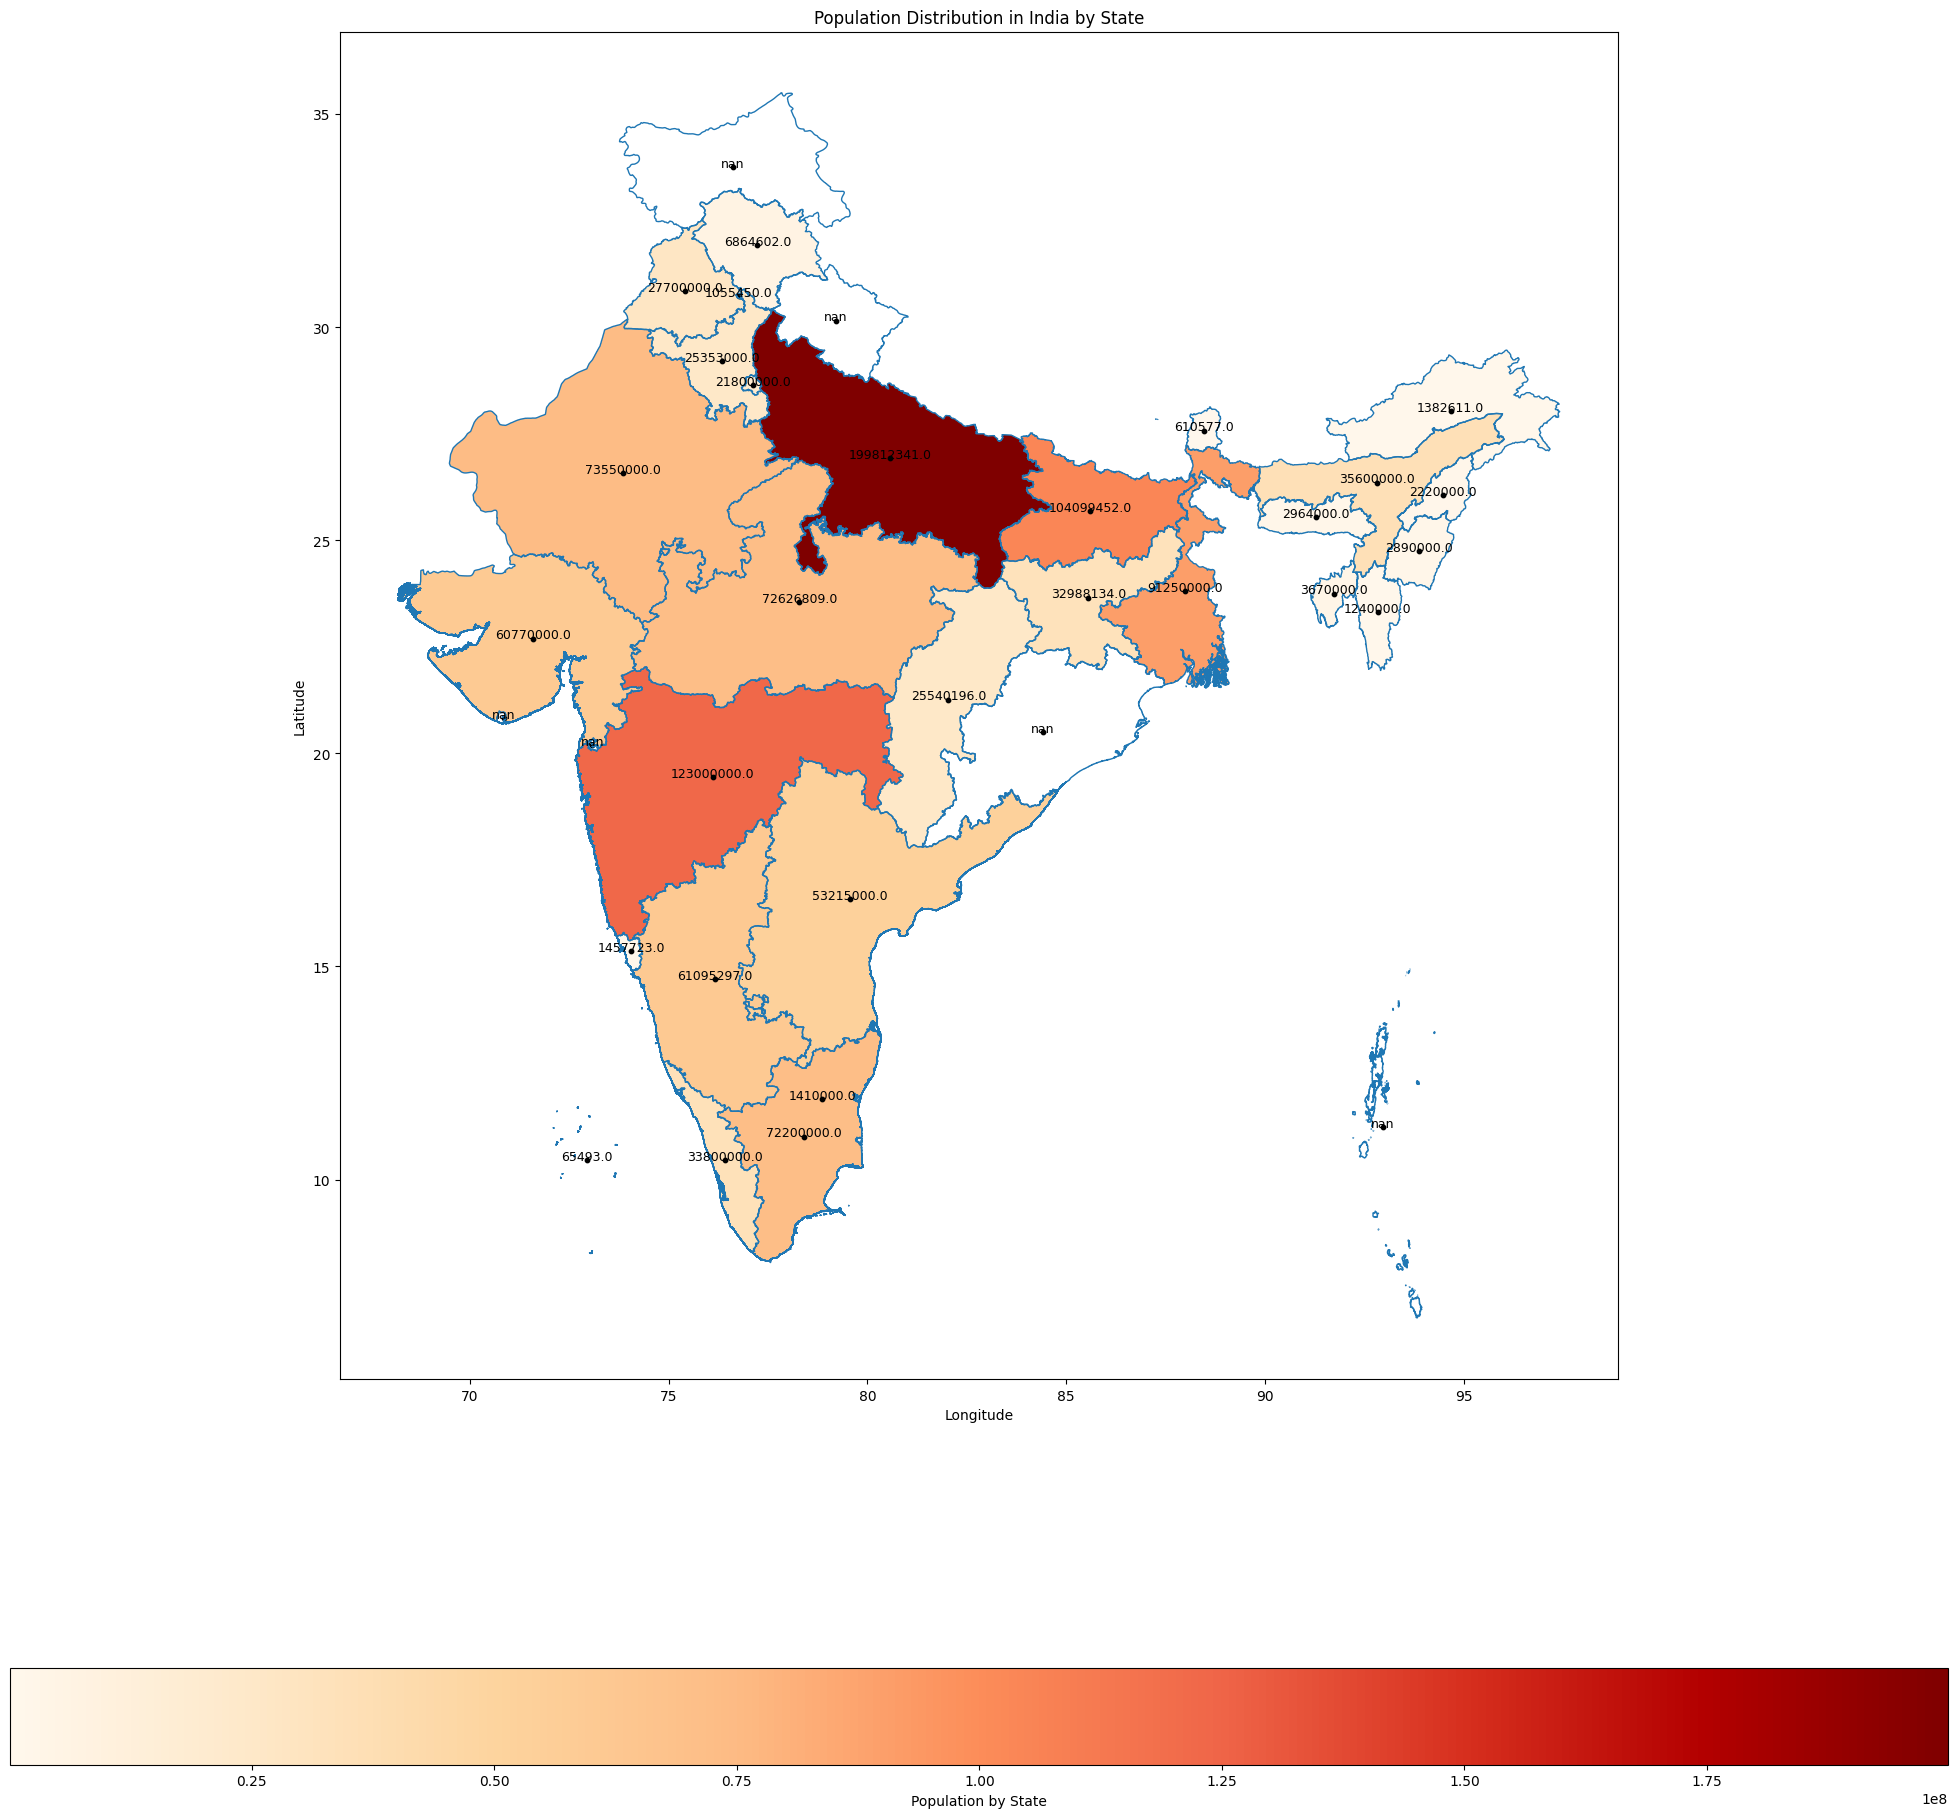

In [12]:
# Plotting the data
fig, ax = plt.subplots(1, 1, figsize=(25, 25))
india_states.boundary.plot(ax=ax, linewidth=1)
merged_data.plot(column='Population', ax=ax, legend=True, cmap='OrRd', 
                 legend_kwds={'label': "Population by State",
                              'orientation': "horizontal"})

# Add title and labels
plt.title('Population Distribution in India by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add population labels
for idx, row in merged_data.iterrows():
    plt.annotate(text=row['Population'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=9, color='black')
    plt.scatter(row['geometry'].centroid.x, row['geometry'].centroid.y, color='black', s=10)


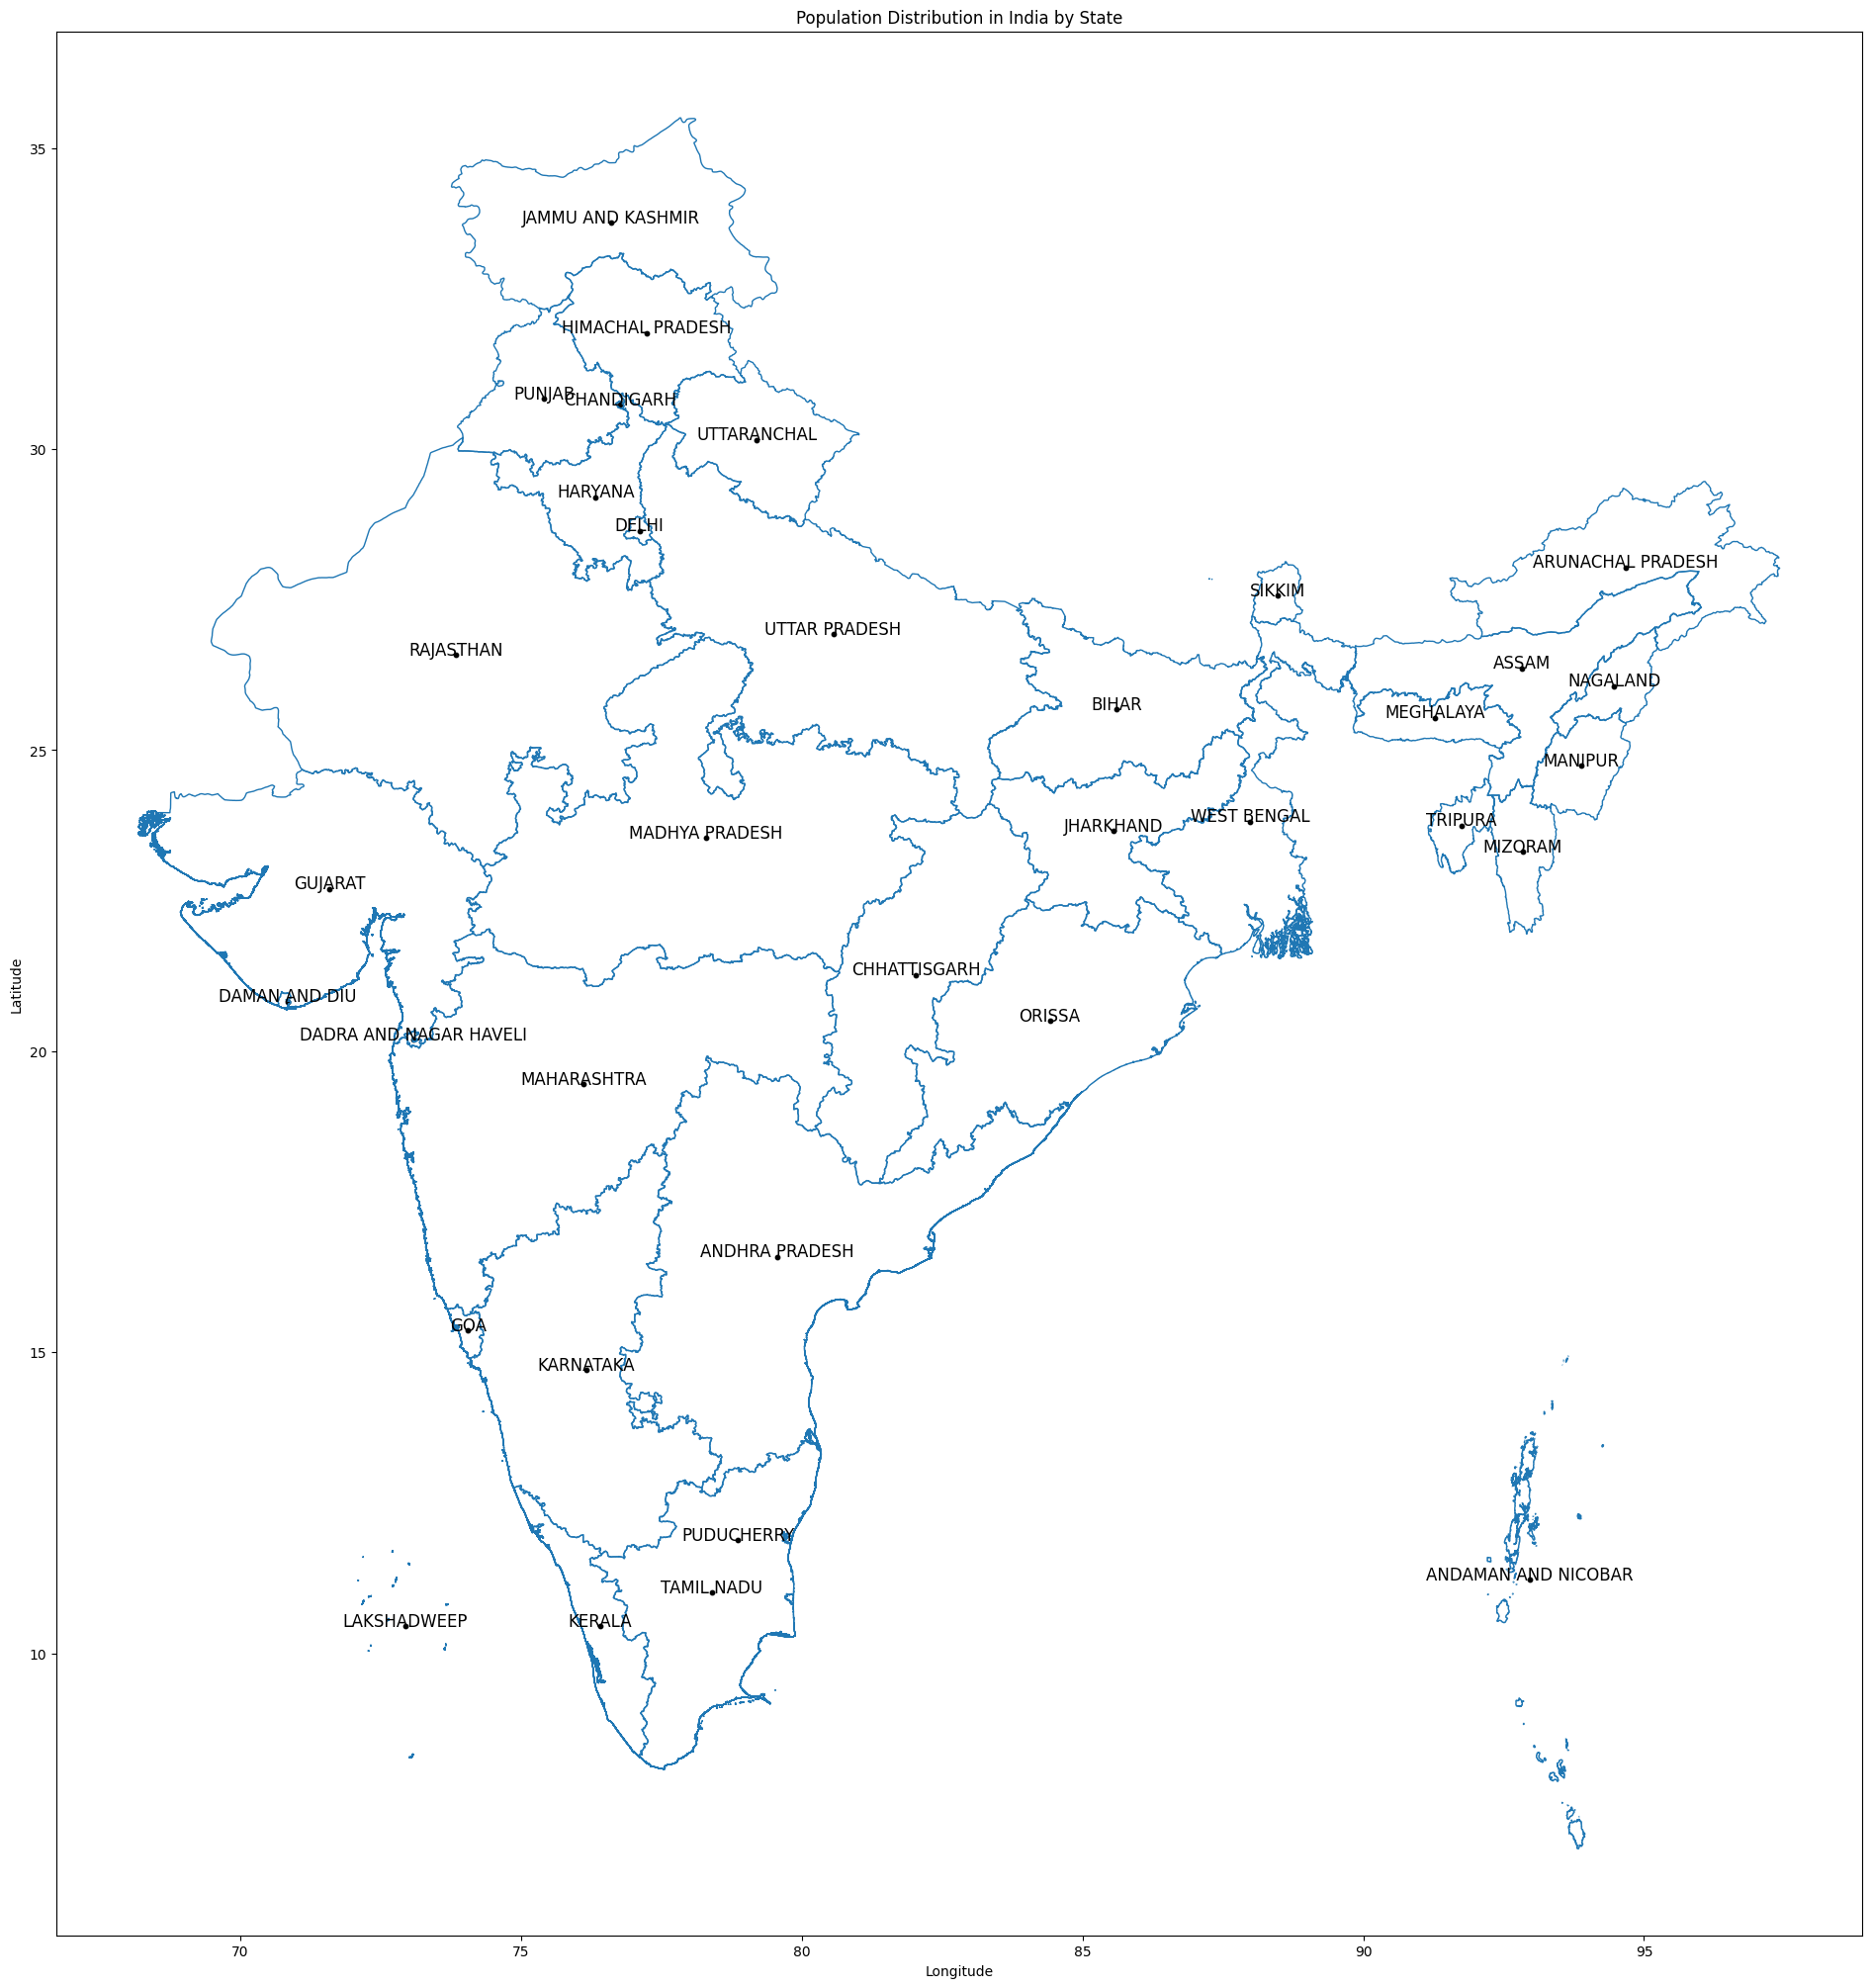

In [15]:
# Plotting the data
fig, ax = plt.subplots(1, 1, figsize=(25, 25))
india_states.boundary.plot(ax=ax, linewidth=1)

# Add title and labels
plt.title('Population Distribution in India by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add population labels
for idx, row in merged_data.iterrows():
    plt.annotate(text=row['STATE_NAME'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=12, color='black')
    plt.scatter(row['geometry'].centroid.x, row['geometry'].centroid.y, color='black', s=10)
